### Práctica de Formatos de datos: XML

El objetivo de esta práctica es crear una aplicación que gestionará información sobre los restaurantes de la ciudad de Madrid. 

Para ello se va a usar el catálogo "Restaurantes con perfil turístico de la ciudad de Madrid" del portal de datos abiertos del Ayuntamiento de Madrid. El conjunto de datos incluye información sobre restaurantes de la ciudad de Madrid divididos por tipos de cocina, especialidades, servicios, etc. Así mismo, se incluyen los datos básicos de cada punto, una descripción, su geoposición y dirección postal, así como un conjunto de fotografías relativas a cada punto. En los casos en los que aplica, se ofrecen horarios de apertura y costes de acceso si los tuviera.
La información se encuentra en:
https://datos.madrid.es/sites/v/index.jsp?vgnextoid=ce33a73970504510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD

Y el conjunto de datos XML que hay que procesar está situado en:
https://datos.madrid.es/egob/catalogo/300033-10037079-turismo-restauracion.xml

Junto al enunciado de la práctica se proporciona el fichero xml a tratar. El siguiente trozo de código permite recuperar el archivo xml en cuestion, y mostrar su contenido.

In [52]:
from xml.etree import ElementTree
from xml.dom import minidom
def prettify(elem):
    """Return a pretty-printed XML string for the Element."""
    rough_string=ElementTree.tostring(elem,"utf-8")
    reparsed=minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

f=open("restaurantes_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)
raiz=arbol.getroot()


print (prettify(raiz))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



__Ejercicio 1 [5 puntos]__

Se pide mostrar al usuario un listado de los nombres de los restaurantes que contiene el archivo con el objetivo de que elija un restaurante y se le muestre de forma amigable(sin etiquetas) por pantalla la información asociada al restaurante que se encuentra en el fichero recuperado:

* Nombre del restaurante: etiqueta name
* Email: etiqueta email
* Teléfono: etiqueta phone
* Descripción: etiqueta body
* Página web: etiqueta web
* Dirección: etiqueta address, etiqueta zipcode
* Horario: etiqueta horario
* Tipo de cocina: etiqueta Tipo


A continuación se le pedira si quiere ver fotos del restaurante, en tal caso se le mostrarán las fotos recuperadas del restaurante. Para mostrar las imagenes puedes usar un trozo de código similar al siguiente.

In [53]:
def sacar_lista_restaurante():
    return list(arbol.findall("./service"))

In [54]:
def mostrar_lista(lista_restaurante):
    i = 0
    for restaurante in lista_restaurante:
        print(str(i+1), restaurante.find("basicData/name").text)
        i+=1

In [61]:
def print_custom(salida):
  print(salida or 'Desconocido')

def print_dir(addr='', provin=' Madrid ', zcode=''):
  print(addr + provin + zcode)



In [56]:
def mostrar_categorias(r):
  print('Tipo de cocina: ')
  for categoria in r.findall('extradata/categorias/categoria'):#En cada categoria
    nombre = ''
    subcategorias = list()
    for im in categoria.iter('item'): #Nombre de categoria
      if im.get('name') == 'Categoria':
                nombre = im.text
    for sub in categoria.findall('subcategorias/subcategoria/item'):#subacategorias
      if sub.get('name') == 'SubCategoria':  
        subcategorias.append(sub.text)
        
    subcategorias = ",".join(subcategorias)
    if subcategorias: #Distinción de caso , si hay subcategorias o no
      print(nombre,':', subcategorias)
    else:
      print(nombre)  

In [57]:
def mostrar_restaurante(r):
    print("Nombre: ", )
    print_custom(r.find("basicData/name").text)
    print("E-mail: ")
    print_custom(r.find("basicData/email").text)
    print("Teléfono: ")
    print_custom(r.find("basicData/phone").text)
    print("Descripción: ", )
    print_custom(r.find("basicData/body").text)
    print("Página web: ", )
    print_custom(r.find("basicData/web").text)
    print('Localizacion: ')
    print_dir(r.find("geoData/address").text, '.Madrid, ', r.find("geoData/zipcode").text)

    mostrar_categorias(r)
    horario = ''
    for n in  r.findall("extradata/item"):
        if n.get('name') == 'Horario':
            horario = n
    print("Horario: ", horario.text)
    

In [58]:
from skimage import io
def mostrar_foto(r):
  for img in r.findall('multimedia/media/url'):
    img_src = img.text
    image = io.imread(img_src)
    io.imshow(image)
    io.show()
    

In [59]:
def menu():
    repet = True
    while(repet):
        lista_restaurante = sacar_lista_restaurante()
        mostrar_lista(lista_restaurante)
        restaurante = int(input("Introduzca el restaurante por su número correspondiente: ")) - 1 #Para usuario , el indice empieza con 1
        mostrar_restaurante(lista_restaurante[restaurante])
        foto = input("¿Mostrar foto? S/N: ")
        if foto == 'S':
            mostrar_foto(lista_restaurante[restaurante])
        repet = "S" == input("¿Repetir la búsqueda? S/N: ")


1 Robuchon Espa&ntilde;a
2 Abbas&iuml;d
3 El Lince
4 Hasaku Nikkei
5 La Negra Tomasa
6 Desde 1911
7 Papagena
8 RavioXO
9 Incl&aacute;n Brutal Bar
10 DSPEAK
11 Mad Gourmets
12 Zen Noodle Bar
13 ZEN Asian Supper Club
14 Madame Butterfly
15 Bakan
16 Sagrario Tradici&oacute;n
17 Garelos
18 NOI
19 Vinoteca Morat&iacute;n
20 Casa Mortero
21 Taberna &Uacute;beda
22 Quimbaya
23 Trattoria Adriana
24 La &Uacute;nica
25 Commodore Madrid
26 La m&aacute;s croqueta
27 El Taller
28 Miss Sushi
29 La Terraza del Santo Domingo
30 MO de Movimiento
31 Coquetto Bar
32 Shukran City Ventas
33 Santa y Pura
34 Mune Madrid
35 Le&ntilde;a
36 Smoked Room
37 Barbecho 
38 Diurno
39 Deessa
40 Villa Verbena
41 Citynizer Plaza
42 Barracuda MX
43 Aloha Pok&eacute;
44 Tripea
45 Castelados
46 La Maruca
47 La MaM&aacute; Restaurante
48 Quinqu&eacute;
49 Saddle
50 Bocanegra
51 Dani Brasserie
52 Bloom
53 La Venencia
54 Gran V&iacute;a 55
55 Bodega de La Ardosa
56 Casa Julio
57 Casa Camacho
58 Bodegas Ricla
59 Bar Santurce
6

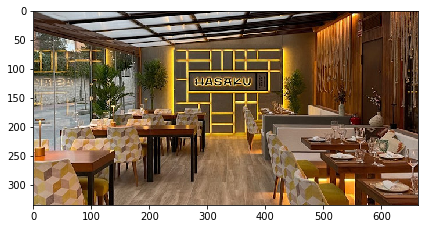

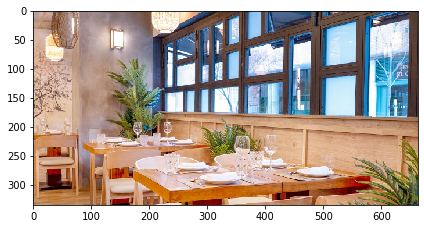

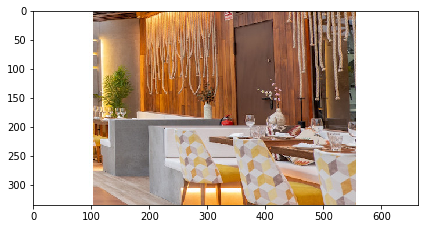

¿Repetir la búsqueda? S/N: N


In [62]:
menu()

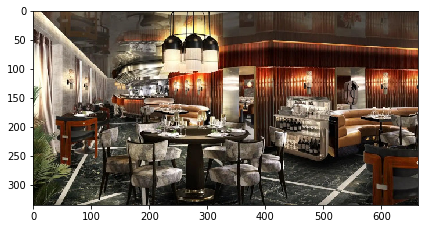

In [ ]:
img_src = 'https://estaticos.esmadrid.com/cdn/farfuture/OdE0pLpf9itK-izdD2Qz8DzXCB2y9S2Prl8AYfNeTiA/mtime:1664200548/sites/default/files/recursosturisticos/restaurantes/joel_robuchon_4.jpg'
from skimage import io
image = io.imread(img_src)
io.imshow(image)
io.show()

Despues de mostrar la información y las imagenes del restaurante elegido se le preguntará si desea volver a ver el listado de restaurantes para ver otro o bien desea finalizar.

Observar:
  * Algunas etiquetas podrían estar vacías o no aparecer. En estos casos, simplemente se mostrará vacío o con la palabra "Desconocido".
  * Hay que limpiar el texto de la descripción eliminando los símbolos especiales del tipo tales como "&lt;/p&gt;&lt;p&gt;" que aparecen en el mismo.

Por ejemplo si el usuario hubiera elegido el restaurante "Hasaku Nikkei" debería mostrarse por pantalla:

__Nombre del restaurante:__

Hasaku Nikkei
    
__Descripción:__
La apuesta culinaria por la cocina nikkei del chef peruano Jhosef Arias se traduce en este restaurante situado en el barrio de Las Tablas. De estética minimalista, en él se puede disfrutar de la mezcla de dos culturas gastronómicas: la peruana y la japonesa, una de las muestras más notorias de la fusión cultural a través de la cocina.El nombre Hasaku proviene del japonés y hace referencia a una naranja agria e híbrida, que, en este caso, tiene relación con la lima y los cítricos, hilo conductor de la cocina peruana. Con este nombre se busca ofrecer una especie de reconocimiento y agradecimiento a la enorme influencia que supuso la inmigración y la cocina japonesa en la gastronomía peruana.Hasaku comenzó siendo un proyecto virtual llevado a cabo durante el cierre de los restaurantes por la pandemia provocada por la COVID-19, al que el chef dedicó muchas horas de experimentación.En su carta se pueden encontrar platos excepcionales que se pueden disfrutar tanto en el local como en casa gracias a su servicio de envio a domicilio. No disponen de menú diario pero sí de dos menús degustación con los platos más destacados de su propuesta gastronomíca.Arias se ha convertido en un referente de la gastronomía peruana en Madrid, donde cuenta con otros restaurantes: Piscomar, en Lavapiés; Humo, en Puente de Vallecas; Callao24, en Arturo Soria; y su más reciente creación,ADN Origen Perú, en la calle Mayor, junto al Mercado de San Miguel. En todos ellos ensalza distintos aspectos de la gastronomía de su tierra. No en vano forma parte de los 50 chefs del movimiento Generación con Causa, creado en Perú para promover la cocina peruana en el mundo, a través de la cuarta generación de cocineros, avalados por el reconocido chef peruano Gastón Acurio.

__Página web:__

https://www.esmadrid.com/restaurantes/hasaku-nikkei
    
__Email:__

Desconocido
    
__Teléfono:__

(+34) 91 210 54 43

__Localización:__ 

María Tubau, 17. Madrid 28050

__Horario:__ 

Mar; Sáb: 13:00-16:00h/20:00- 01:00 ; Domingo: 13:00-16:00 h

__Tipo de cocina:__ 

Internacional: Fusión, Internacional, Japonesa, Peruana

__Ejercicio 2 [2.5 puntos]__

Este ejercicio se pide crear un buscador sobre la información recuperada, de forma que el usuario podrá buscar restaurantes por el tipo de cocina ofrecida en un restaurante. Para ello se le mostrará un listado con los diferentes tipos de cocina que se han encontrado en el fichero, y el usuario elegirá un tipo de cocina.  Como resultado debería mostrarse un listado de todas los restaurantes que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los restaurantes. A continuación el usuario elegirá uno de los restaurantes y entonces se le mostrará  la misma información del restaurante que en el ejercicio 1. 

Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

In [ ]:
# Construye un diccionario cuyas claves son las categorías y los valores son listas con las subcategorías (en caso de haberlas)
def tipos_de_cocina():
    tipos_cocina = dict()

    for nodo in arbol.findall("service"):
        categorias = nodo.find("extradata/categorias")
        for cat in categorias:
            cat_name = cat.findall("item")[1].text
            if cat_name not in tipos_cocina:
                tipos_cocina[cat_name] = list()
            try:
                for subcat in cat.find("subcategorias"):
                    subcat_name = subcat.findall("item")[1].text
                    if subcat_name not in tipos_cocina[cat_name]:
                        tipos_cocina[cat_name].append(subcat_name)
            except TypeError:
                pass
    return tipos_cocina

def menu_cocina(tipos_cocina):
    for i,cat in enumerate(tipos_cocina.keys()):
        print(f"{i+1} - {cat}")
        subcats = list(tipos_cocina[cat])
        for j,sub in enumerate(subcats):
            print(f"    {i+1}.{j+1} - {sub}")

    return input("Seleccione un tipo de cocina:")

# Construye una lista con las tuplas (nombre, id) de los restaurantes que pertenecen a una determinada categoría o subcategoría
def lista_restaurantes(categoria):
    restaurantes = list(tuple())
    for nodo in arbol.findall("service"):
        categorias = nodo.find("extradata/categorias")
        # Busca en categorías y sino en subcategorías
        for cat in categorias:
            if cat.findall("item")[1].text == categoria:
                restaurantes.append((nodo.find("basicData/name").text, nodo.attrib["id"]))
                break
            else:
                try:
                    for subcat in cat.find("subcategorias"):
                        if subcat.findall("item")[1].text == categoria:
                            restaurantes.append((nodo.find("basicData/name").text, nodo.attrib["id"]))
                except TypeError:
                    pass

    return restaurantes

def menu_restaurantes(restaurantes):
    for i,res in enumerate(restaurantes):
        print(f"{i+1}: {res[0]}")
    return int(input("Seleccione un restaurante:")) - 1

def buscar_categoria(tipos_cocina, opcion):
    keys = list(tipos_cocina)
    # Si se elige una subcategoría se accede a la lista de subcategorías a través del número de detrás del punto
    if "." in opcion:
        return tipos_cocina[keys[int(opcion[0]) - 1]][int(opcion[2]) - 1]
    else:
        return keys[int(opcion)]

def buscar_restaurante(id):
    res = None
    for nodo in arbol.findall("service"):
        if nodo.attrib["id"] == id:
            res = nodo
    return res


tipos_cocina = tipos_de_cocina()

seguir = True
while seguir:
    opcion = menu_cocina(tipos_cocina)

    categoria = buscar_categoria(tipos_cocina, opcion)

    print(f"\nRestaurantes de cocina {categoria}:")
    restaurantes = lista_restaurantes(categoria)
    opcion = menu_restaurantes(restaurantes)

    restaurante = buscar_restaurante(restaurantes[opcion][1])

    # TODO: Añadir la funcion de mostrar la info del restaurante del ej1
    # mostrar_restaurante(restaurante)

    seguir = input("¿Desea seguir buscando?(s/n): ") == "s"

1 - Internacional
    1.1 - Fusión
    1.2 - Internacional
    1.3 - Japonesa
    1.4 - Peruana
    1.5 - Cubana
    1.6 - Asiática
    1.7 - China
    1.8 - Tailandesa
    1.9 - Mexicana
    1.10 - Italiana
    1.11 - Colombiana
    1.12 - Libanesa
    1.13 - Hawaiana
    1.14 - Latinoamericana
    1.15 - Norteamericana
    1.16 - Coreana
    1.17 - Francesa
    1.18 - Chilena
    1.19 - Israelí
    1.20 - Vietnamita
    1.21 - Árabe
    1.22 - Venezolana
    1.23 - Hindú
    1.24 - Belga
    1.25 - Portuguesa
    1.26 - Argentina
    1.27 - Brasileña
    1.28 - Marroqui
    1.29 - Europea
    1.30 - Africana
    1.31 - Caribeña
    1.32 - Griega
    1.33 - Siria
    1.34 - Iraní
    1.35 - Persa
    1.36 - Rusa
    1.37 - Irlandesa
    1.38 - Alemana
2 - De autor
3 - Tapas
    3.1 - Tapas
    3.2 - Gastrobares
4 - Española
    4.1 - Mediterránea
    4.2 - Tradicional
    4.3 - Marisquería
    4.4 - Española
    4.5 - Madrileña
    4.6 - Casera
    4.7 - Tradicional renovada
    4.8 -

 __Ejercicio 3[2.5 puntos]__

Este ejercicio se pide crear un buscador de restaurantes por cercania a una calle indicada por el usuario. Para ello se usará la librería GeoPy que se usó en la práctica 2 y la información de latitud y longitud que aparece en el archivo xml de cada uno de los restaurantes. Se le preguntará al usuario que introduzca por teclado el nombre de la información de la calle, y la distancia en kilómetros de cercania.
 
Como resultado debería mostrarse un listado de todas los restaurantes que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los restaurantes. A continuación el usuario elegirá uno de los restaurantes y entonces se le mostrará  la misma información del restaurante que en el ejercicio 1.  En caso de no existir un restaurante con las condiciones dadas, se mostrará un mensaje informativo.

 Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Restaurantes cercnaos")

def dist(restaurante, location):
    
    try:
        lat_res = float(restaurante.find("geoData").find("latitude").text)
        lon_res = float(restaurante.find("geoData").find("longitude").text)
  
        return haversine(lat_res, lon_res, location.latitude, location.longitude)
    
    except TypeError:
        print("aaaaaaa")
        return None

restaurantes = arbol.findall("service")
while True:
    
    calle = input("Introduce una calle: ")
    max_dist = float(input("Introduce la distancia máxima en km: "))
    location = geolocator.geocode(calle + ", Madrid, España", addressdetails=True)
    
    dist_restaurantes = [(ind, dist(rest, location)) for ind, rest in enumerate(restaurantes)]
    rest_proximos = [x for x in dist_restaurantes if x[1] <= max_dist]
    rest_proximos.sort(key=lambda x: x[1])
    print("-------------------------------------------------")
    
    if len(rest_proximos) > 0:
                   
        for ind, dist_res in enumerate(rest_proximos):
            
            id_res = dist_res[0]
            km = dist_res[1]
            #print(id_res)            
            print(f"{ind + 1}: {restaurantes[id_res].find('basicData').find('name').text} ({round(km, 2)}km)")
            
        opcion = input("\nEscoja una opción: ")
        # TODO: aplicar función del ej1 a restaurantes[opcion] para mostrar información del
        # restaurante ecogido.
            
    else:
        print("No hay restaurantes cercanos")
        
    if input("\nQuiere realizar otra búsqueda (si/no): ").lower() == "no":
        break


Introduce una calle: avenida machupichu
Introduce la distancia máxima en km: 1
-------------------------------------------------
1: Ruta 77 Palacio de Hielo (0.09km)
2: Pieology (0.18km)
3: Al Punto (0.28km)
4: Minotauro  (0.29km)
5: Giulietta (0.53km)
6: Trattoria Adriana (0.98km)

Escoja una opción: 2

Quiere realizar otra búsqueda (si/no): no


Normas de entrega

   * Fecha tope de entrega: 06/10/2022
   * La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre FormatosII_GrupoX donde X será el número de grupo correspondiente.
